In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [2]:
# 데이터셋 인스턴스 생성

data = pd.read_csv('C:/Users/hanyo/Downloads/diabetes.csv')  # CSV 파일 경로
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# print("결측치 개수 확인:\n", data.isna().sum())

In [3]:
#print("결측치 개수 확인:\n", data[data['BloodPressure'].isna()]) # 특정 컬럼만 보기

In [4]:
import numpy as np

# 예: BloodPressure 컬럼에서 값이 0인 경우 NaN으로 바꾸기
# data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)

cols_to_fix = ['BloodPressure', 'Glucose', 'BMI', 'SkinThickness', 'Insulin','Age']
data[cols_to_fix] = data[cols_to_fix].replace(0, np.nan)

print("결측치 개수 확인:\n", data.isna().sum())
data = data.dropna(subset=cols_to_fix)

결측치 개수 확인:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
data = data.dropna()


In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [7]:
print(data['BloodPressure'].describe())


count    392.000000
mean      70.663265
std       12.496092
min       24.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      110.000000
Name: BloodPressure, dtype: float64


<AxesSubplot:ylabel='BloodPressure'>

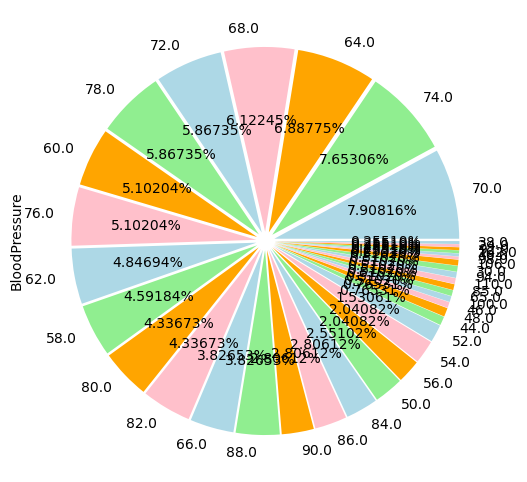

In [8]:
counts = data.BloodPressure.value_counts()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.BloodPressure.value_counts().plot(kind='pie', autopct='%0.05f%%', 
                        colors=['lightblue', 'lightgreen', 'orange', 'pink'],explode=[0.05] * len(counts))

C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


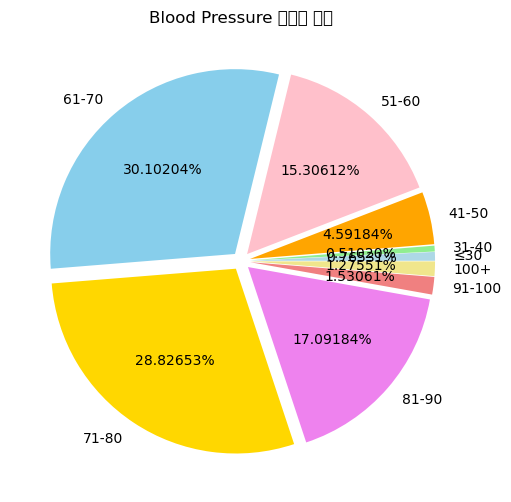

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# BloodPressure 값 범위로 구간 나누기
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['≤30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
bp_binned = pd.cut(data['BloodPressure'], bins=bins, labels=labels, right=True, include_lowest=True)

# 구간별 개수 세기
counts = bp_binned.value_counts().sort_index()

# 파이차트 크기 조정
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# 파이차트 그리기
counts.plot(kind='pie',
            autopct='%0.05f%%',
            colors=['lightblue', 'lightgreen', 'orange', 'pink', 'skyblue', 'gold', 'violet', 'lightcoral', 'khaki'],
            explode=[0.05] * len(counts),
            ylabel='')  # ylabel 없애서 깔끔하게
plt.title('Blood Pressure 범위별 분포')
plt.show()


In [ ]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [12]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,17,16,15,60,56,30,0,0
4,0,64,3,27,100,166,328,12,1
6,3,6,7,24,56,80,64,5,1
8,2,115,18,37,177,76,21,32,1
13,1,110,12,15,183,72,136,38,1
...,...,...,...,...,...,...,...,...,...
753,0,105,28,36,175,167,49,5,1
755,1,56,28,31,68,123,304,16,1
760,2,16,11,18,2,58,265,1,0
763,10,29,21,40,106,92,31,41,0


In [18]:
# 데이터와 타겟 분리
# X = data.drop('BloodPressure', axis=1).values
# y = data['BloodPressure'].values

# 특징(X), 라벨(y) 분리
X = data.drop('BloodPressure', axis=1).values
y = data['BloodPressure'].values.reshape(-1, 1)  # (batch, 1)


In [23]:
# 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((313, 8), (79, 8), (313, 1), (79, 1))

In [25]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [26]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([313, 8]),
 torch.Size([79, 8]),
 torch.Size([313, 1]),
 torch.Size([79, 1]))

In [28]:
# 모델 정의

class diabetes_bp(nn.Module):
    def __init__(self, input_dim):
        super(diabetes_bp, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = diabetes_bp(input_dim=X.shape[1])


In [29]:
# 손실함수 설정 , 옵티마이저 설정

criterion = nn.MSELoss()  # 분류는 CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [45]:
epochs = 100
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.float()       # 모델 입력은 float
        labels = labels.float()       # 회귀에서는 라벨도 float!

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 0.2719
Epoch 20/100, Loss: 0.1448
Epoch 30/100, Loss: 0.1814
Epoch 40/100, Loss: 0.1645
Epoch 50/100, Loss: 0.1071
Epoch 60/100, Loss: 0.2215
Epoch 70/100, Loss: 0.1752
Epoch 80/100, Loss: 0.0961
Epoch 90/100, Loss: 0.0821
Epoch 100/100, Loss: 0.0806


In [46]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 0.8534


C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


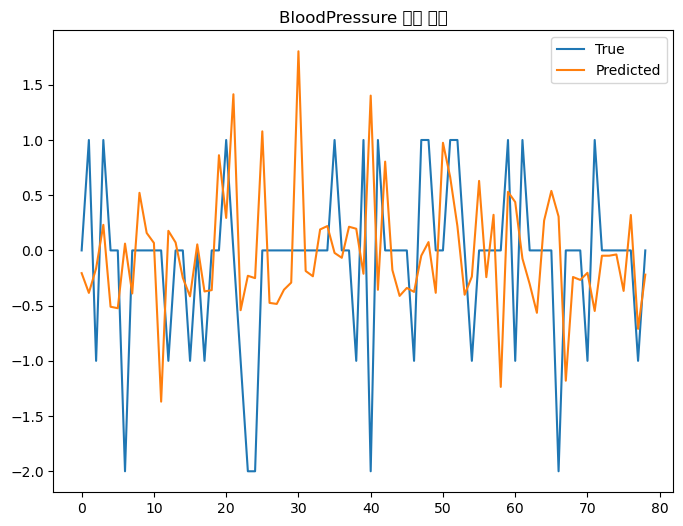

In [49]:
# 예측 및 실제 값 되돌리기
pred_np = scaler_y.inverse_transform(predictions.numpy())
true_np = scaler_y.inverse_transform(y_test.numpy())

# 시각화 등 가능
import matplotlib.pyplot as plt

plt.plot(true_np, label='True')
plt.plot(pred_np, label='Predicted')
plt.legend()
plt.title('BloodPressure 예측 결과')
plt.show()